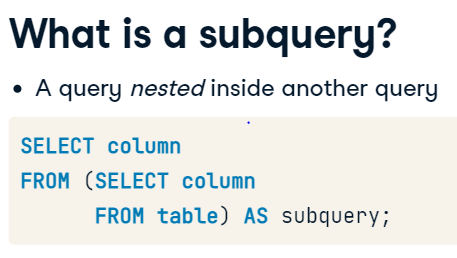
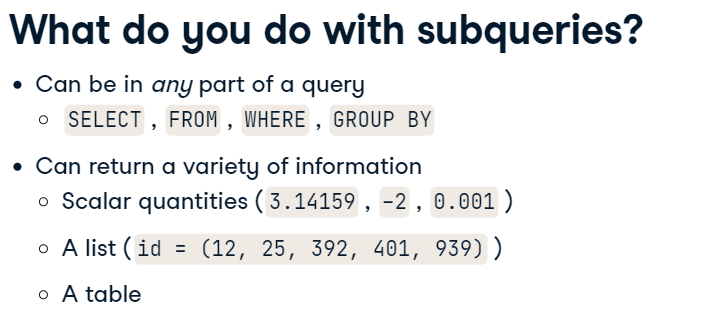
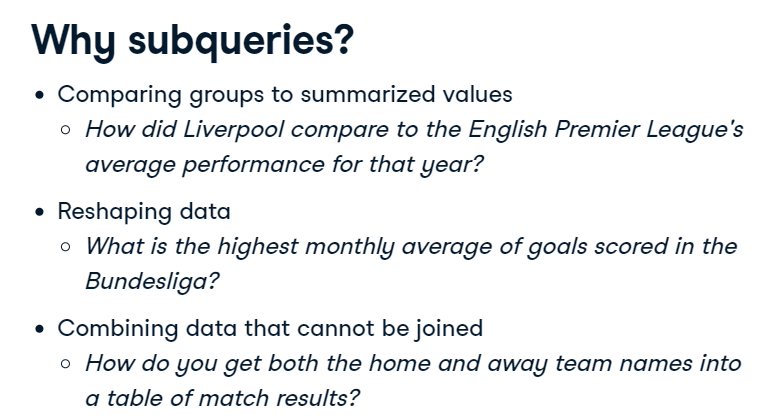
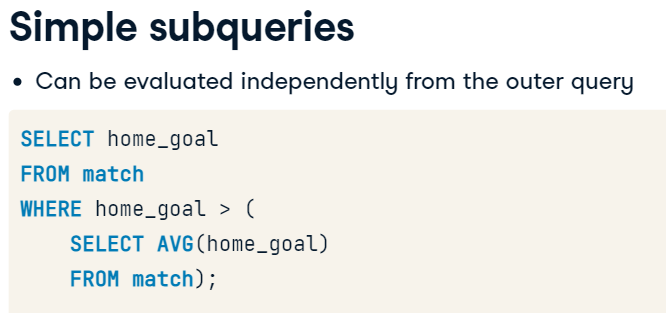
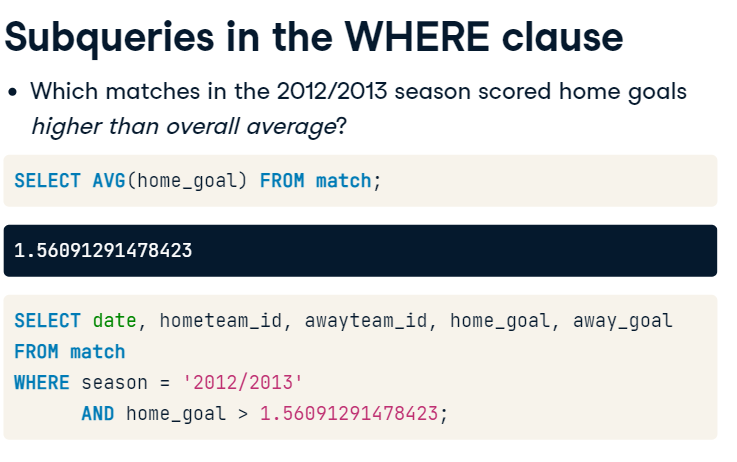
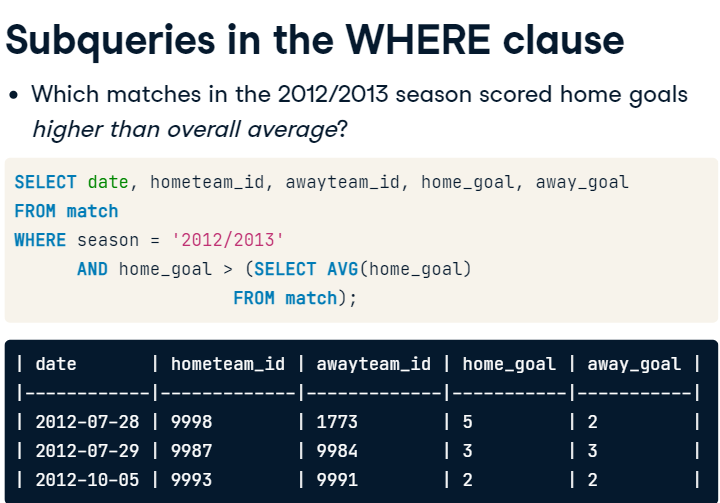
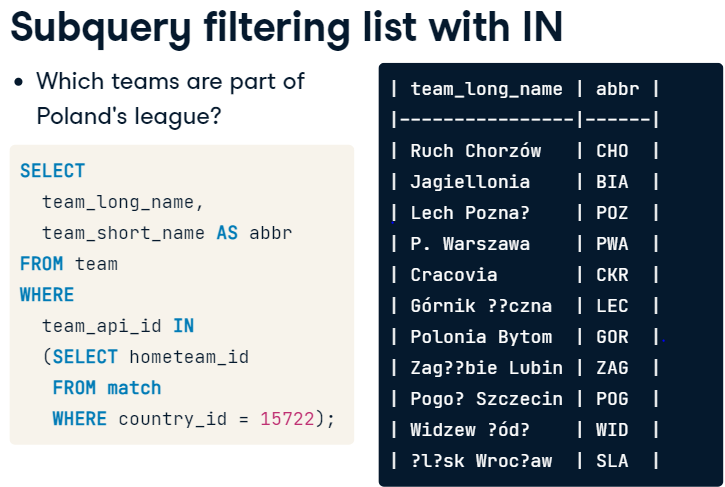
#### Filtering using scalar subqueries
Subqueries are incredibly powerful for performing complex filters and transformations. You can filter data based on single, scalar values using a subquery in ways you cannot by using WHERE statements or joins. Subqueries can also be used for more advanced manipulation of your data set. You will likely encounter subqueries in any real-world setting that uses relational databases.

In this exercise, you will generate a list of matches where the total goals scored (for both teams in total) is more than 3 times the average for games in the matches_2013_2014 table, which includes all games played in the 2013/2014 season.

Calculate triple the average home + away goals scored across all matches. This will become your subquery in the next step. Note that this column does not have an alias, so it will be called ?column? in your results.

```sql
-- Select the average of home + away goals, multiplied by 3
SELECT 
3 * AVG(home_goal + away_goal)
FROM matches_2013_2014;
```

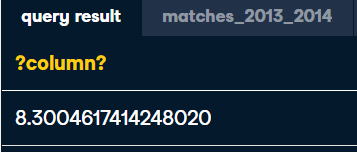

- Select the date, home goals, and away goals in the main query.
- Filter the main query for matches where the total goals scored exceed the value in the subquery.

```sql
SELECT 
	-- Select the date, home goals, and away goals scored
    date,
	home_goal,
	away_goal
FROM  matches_2013_2014
-- Filter for matches where total goals exceeds 3x the average
WHERE (home_goal + away_goal) > 
       (SELECT 3 * AVG(home_goal + away_goal)
        FROM matches_2013_2014); 
```
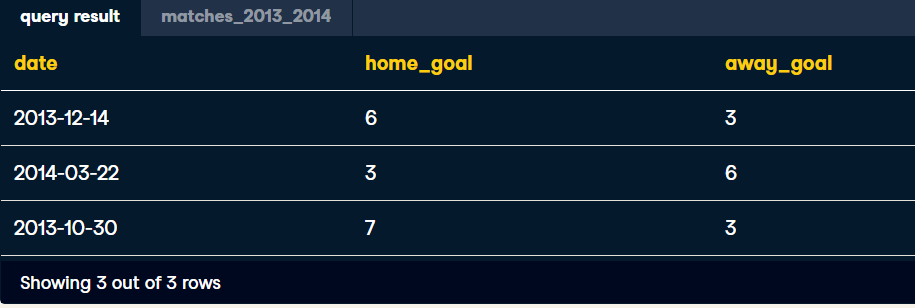

#### Filtering using a subquery with a list
Your goal in this exercise is to generate a list of teams that never played a game in their home city. Using a subquery, you will generate a list of unique hometeam_ID values from the unfiltered match table to exclude in the team table's team_api_ID column.

In addition to filtering using a single-value (scalar) subquery, you can create a list of values in a subquery to filter data based on a complex set of conditions. This type of subquery generates a one column reference list for the main query. As long as the values in your list match a column in your main query's table, you don't need to use a join -- even if the list is from a separate table.


- Create a subquery in the WHERE clause that retrieves all unique hometeam_ID values from the match table.
- Select the team_long_name and team_short_name from the team table. Exclude all values from the subquery in the main query.

```sql
SELECT 
	-- Select the team long and short names
	team_long_name,
	team_short_name
FROM team 
-- Exclude all values from the subquery
WHERE team_api_id NOT IN
     (SELECT DISTINCT  hometeam_id FROM match);
```

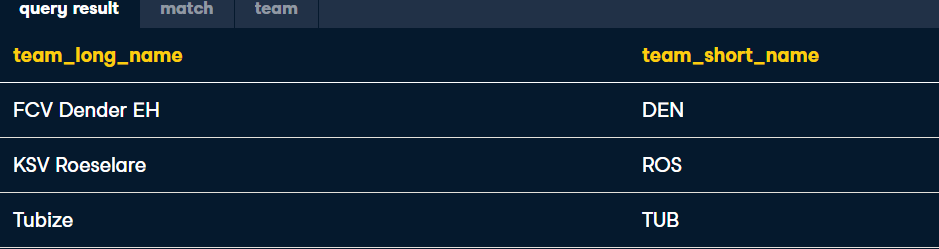



- Create a subquery in WHERE clause that retrieves all hometeam_ID values from match with a home_goal score greater than or equal to 8.
- Select the team_long_name and team_short_name from the team table. Include all values from the subquery in the main query.

```sql
SELECT
	-- Select the team long and short names
	team_long_name,
	team_short_name
FROM team
-- Filter for teams with 8 or more home goals
WHERE team_api_id IN
	  (SELECT hometeam_id 
       FROM match
       WHERE home_goal >= 8);
```
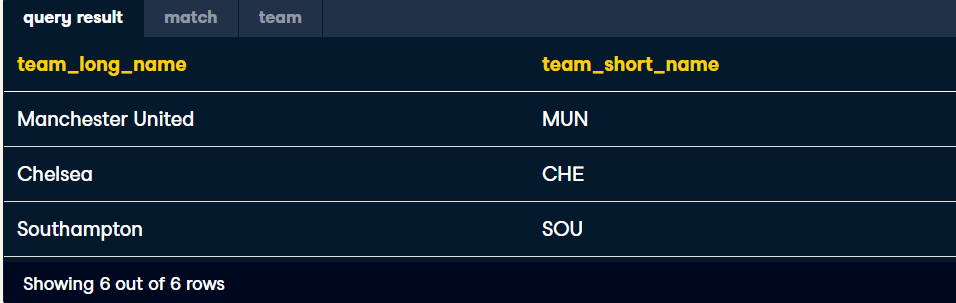



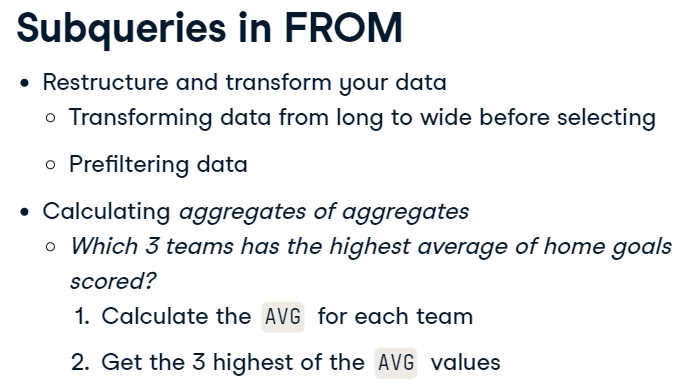

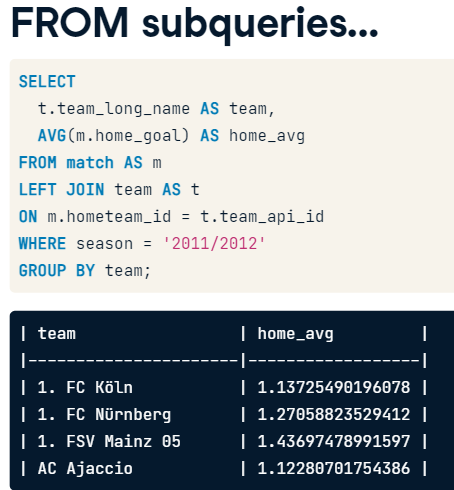
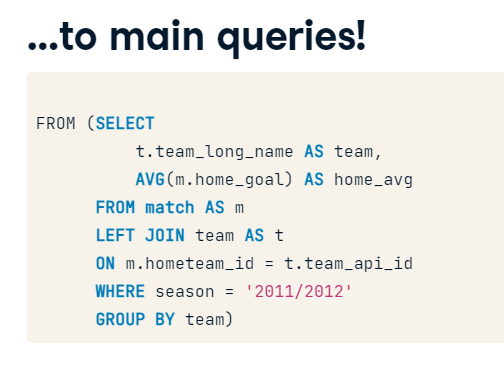
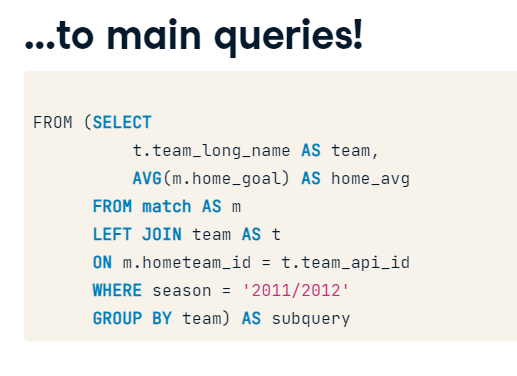
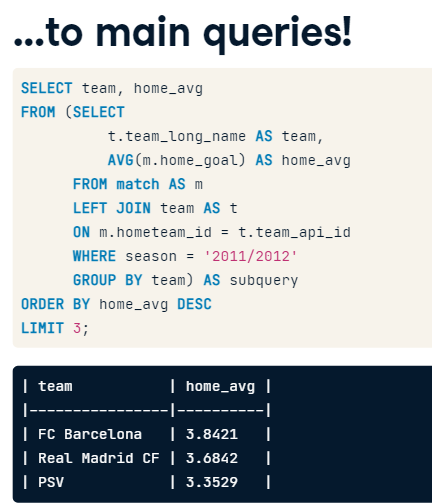
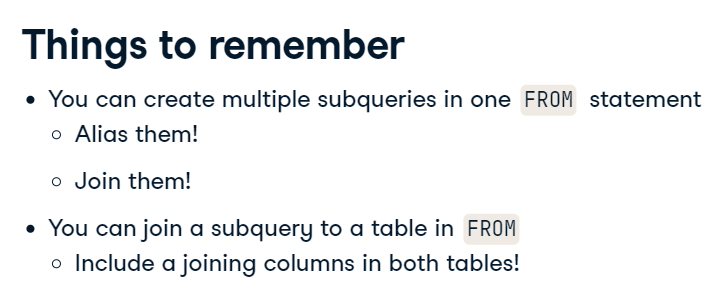

#### Joining Subqueries in FROM
The match table in the European Soccer Database does not contain country or team names. You can get this information by joining it to the country table, and use this to aggregate information, such as the number of matches played in each country.

If you're interested in filtering data from one of these tables, you can also create a subquery from one of the tables, and then join it to an existing table in the database. A subquery in FROM is an effective way of answering detailed questions that requires filtering or transforming data before including it in your final results.

Your goal in this exercise is to generate a subquery using the match table, and then join that subquery to the country table to calculate information about matches with 10 or more goals in total!


- Create the subquery to be used in the next step, which selects the country ID and match ID (id) from the match table.
- Filter the query for matches with greater than or equal to 10 goals.

```sql
SELECT 
	-- Select the country ID and match ID
	country_id, 
    id 
FROM match
-- Filter for matches with 10 or more goals in total
WHERE (home_goal + away_goal) >= 10;
```
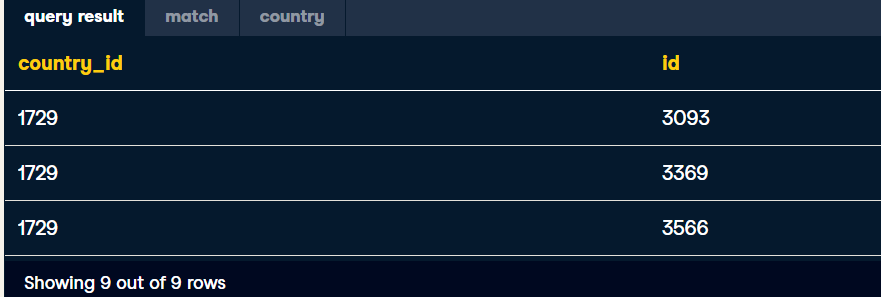


- Construct a subquery that selects only matches with 10 or more total goals.
- Inner join the subquery onto country in the main query.
- Select name from country and count the id column from match.

```sql
SELECT
	-- Select country name and the count match IDs
    c.name AS country_name,
    COUNT(sub.id) AS matches
FROM country AS c
-- Inner join the subquery onto country
-- Select the country id and match id columns
INNER JOIN (SELECT country_id, id 
            FROM match
            -- Filter the subquery by matches with 10+ goals
            WHERE (home_goal + away_goal) >= 10) AS sub
ON c.id = sub.country_id
GROUP BY country_name;
```
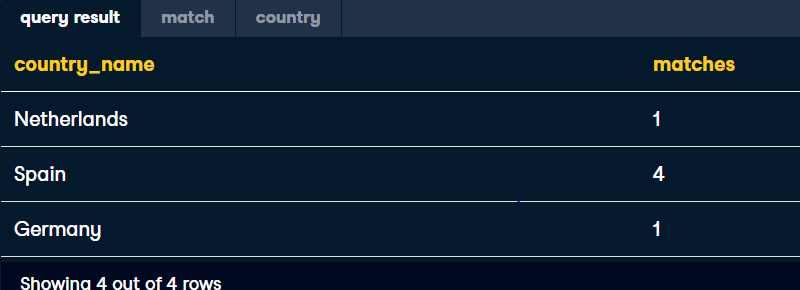

You generated a count of matches in each country where the total goals was higher than 10. That's a lot of goals!


- Complete the subquery inside the FROM clause. Select the country name from the country table, and the home goal, and away goal columns from the match table.
- Create a column in the subquery that adds home and away goals, called total_goals. This will be used to filter the main query.
- Select the country, date, home goals, and away goals in the main query.
- Filter the main query for games with 10 or more total goals.


```sql
SELECT
	-- Select country, date, home, and away goals from the subquery
    country,
    date,
    home_goal,
    away_goal
FROM
	-- Select country name, date, and total goals in the subquery
	(SELECT c.name AS country, 
     	    m.date, 
     		m.home_goal, 
     		m.away_goal,
           (m.home_goal + m.away_goal) AS total_goals
    FROM match AS m
    LEFT JOIN country AS c
    ON m.country_id = c.id) AS subquery
-- Filter by total goals scored in the main query
WHERE total_goals >= 10;
```
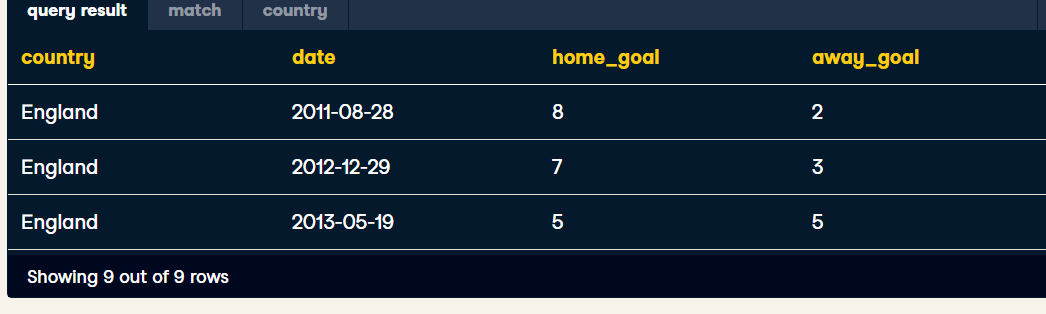

You can manipulate the information you extract by placing joins in or using a subquery. These must have been exciting matches!



